In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import dask
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Load datasets

In [2]:
budgFw = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_fw.nc').budg_fw
budgH = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_heat.nc').budg_heat

In [3]:
# Liquid Freshwater Content Anomaly
lfwc_spna = budgFw.sel(region='spna',term='lfwc') - budgFw.sel(region='spna',term='lfwc').mean('time')
lfwc_nsea = budgFw.sel(region='nsea',term='lfwc') - budgFw.sel(region='nsea',term='lfwc').mean('time')

# Ocean Hean Content Anomaly
ohca_spna = budgH.sel(region='spna',term='ohc') - budgH.sel(region='spna',term='ohc').mean('time')
ohca_nsea = budgH.sel(region='nsea',term='ohc') - budgH.sel(region='nsea',term='ohc').mean('time')

In [5]:
lfwc_spna_ec_monthly = xr.open_dataset('/mnt/efs/data/ecco/eccov4r4_lfwc_spna_monthly.nc').lfwc
lfwc_nsea_ec_monthly = xr.open_dataset('/mnt/efs/data/ecco/eccov4r4_lfwc_nsea_monthly.nc').lfwc

In [6]:
ohc_spna_ec_monthly = xr.open_dataset('/mnt/efs/data/ecco/eccov4r4_ohc_spna_monthly.nc').ohc
ohc_nsea_ec_monthly = xr.open_dataset('/mnt/efs/data/ecco/eccov4r4_ohc_nsea_monthly.nc').ohc

In [8]:
lfwc_spna_CM05 = lfwc_spna_ec_monthly - lfwc_spna_ec_monthly.mean('time')
lfwc_nsea_CM05 = lfwc_nsea_ec_monthly - lfwc_nsea_ec_monthly.mean('time')
ohca_spna_CM05 = ohc_spna_ec_monthly - ohc_spna_ec_monthly.mean('time')
ohca_nsea_CM05 = ohc_nsea_ec_monthly - ohc_nsea_ec_monthly.mean('time')

### Plot

In [9]:
class OffsetYearLocator(dates.YearLocator):
    def __init__(self, *args, **kwargs):
        self.offset = kwargs.pop("offset", 0)
        dates.YearLocator.__init__(self,*args, **kwargs)
    def tick_values(self, vmin, vmax):
        ymin = self.base.le(vmin.year) * self.base.step - self.offset
        ymax = self.base.ge(vmax.year) * self.base.step + (self.base.step-self.offset)
        ticks = [vmin.replace(year=ymin, **self.replaced)]
        while True:
            dt = ticks[-1]
            if dt.year >= ymax:
                return dates.date2num(ticks)
            year = dt.year + self.base.step
            ticks.append(dt.replace(year=year, **self.replaced))

def format_xaxis(ax):

    years = dates.YearLocator(10,month=1,day=1)
    years1=OffsetYearLocator(2,month=1,day=1, offset=1)
    dfmt = dates.DateFormatter('%Y')
    dfmt1 = dates.DateFormatter('%y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(years1)
    ax.xaxis.set_major_formatter(dfmt)
    ax.xaxis.set_minor_formatter(dfmt1)
    ax.get_xaxis().set_tick_params(which='major', pad=15)

    plt.setp(ax.get_xmajorticklabels(), rotation=0, weight="bold", ha="center")

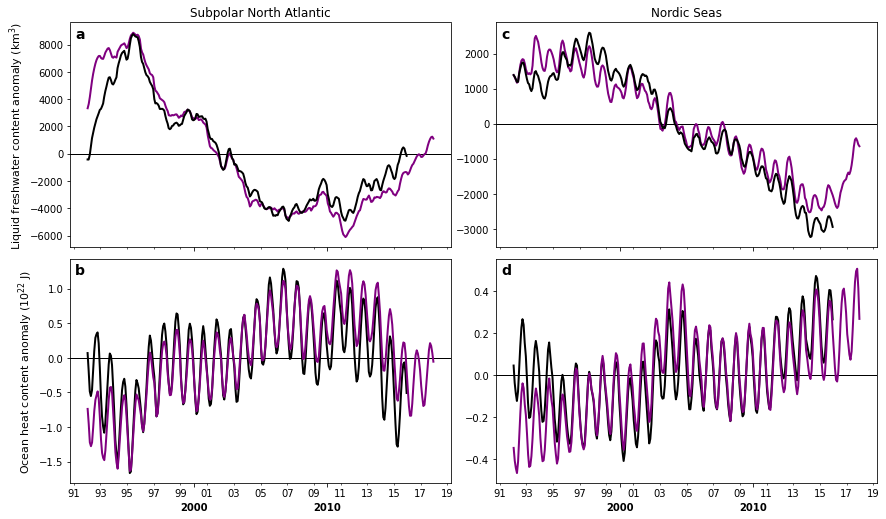

In [12]:
fig, axs = plt.subplots(2, 2,sharex=True, figsize=(14, 8))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,0].plot(lfwc_spna_CM05.time, lfwc_spna_CM05, lw=2, ls='-', color='purple')
axs[0,0].plot(lfwc_spna.time, lfwc_spna*1e-3, lw=2, color='black')
axs[0,0].set_ylabel(r'Liquid freshwater content anomaly (km$^3$)',fontsize=11)
axs[0,0].text(0.013,0.93, 'a', fontsize=14, fontweight='bold', transform=axs[0,0].transAxes)
axs[0,0].set_title(r'Subpolar North Atlantic', fontsize=12)

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,0].plot(ohca_spna.time, ohca_spna*1e-22, lw=2, color='black')
axs[1,0].plot(ohca_spna_CM05.time, ohca_spna_CM05*1e-22, lw=2, ls='-', color='purple')

axs[1,0].set_ylabel(r'Ocean heat content anomaly (10$^{22}$ J)', fontsize=11)
format_xaxis(axs[1,0])
axs[1,0].text(0.013,0.93, 'b', fontsize=14, fontweight='bold', transform=axs[1,0].transAxes)

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,1].plot(lfwc_nsea_CM05.time, lfwc_nsea_CM05, lw=2, ls='-', color='purple')
axs[0,1].plot(lfwc_nsea.time, lfwc_nsea*1e-3, lw=2, color='black')
axs[0,1].text(0.013,0.93, 'c', fontsize=14, fontweight='bold', transform=axs[0,1].transAxes)
axs[0,1].set_title(r'Nordic Seas', fontsize=12)

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,1].plot(ohca_nsea.time, ohca_nsea*1e-22, lw=2, color='black')
axs[1,1].plot(ohca_nsea_CM05.time, ohca_nsea_CM05*1e-22, lw=2, ls='-', color='purple')
format_xaxis(axs[1,1])
axs[1,1].text(0.013,0.93, 'd', fontsize=14, fontweight='bold', transform=axs[1,1].transAxes)

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.05, wspace=0.12)

plt.savefig('/mnt/efs/figure.png')
plt.savefig('/mnt/efs/figure.eps')
plt.show()

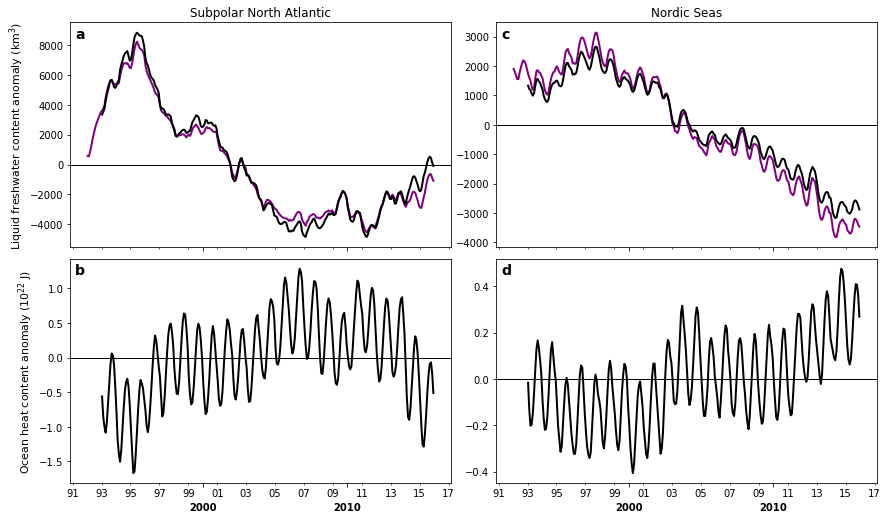